In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [29]:
df= pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [30]:
df.shape

(8693, 14)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [32]:
low_cardinality_cols = [cname for cname in df.columns if df[cname].nunique() < 10 and 
                        df[cname].dtype == "object"]
low_cardinality_cols

['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

In [33]:
# Select numerical columns
numerical_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
numerical_cols

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [34]:
my_cols = low_cardinality_cols + numerical_cols
my_cols

['HomePlanet',
 'CryoSleep',
 'Destination',
 'VIP',
 'Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck']

In [35]:
missing_values=df.isna().sum()
missing_values
number_missing_values=missing_values.sum()
number_missing_values

2324

In [36]:
total_cells =np.product(df.shape)
total_cells
percentage_missing_values = (number_missing_values /total_cells) *100
percentage_missing_values

1.9095824226389047

In [37]:
to_drop=df[df.isna().any(axis=1)]
to_drop
to_drop.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [38]:
cols_with_missing = [col for col in df.columns
                     if df[col].isnull().any()]
cols_with_missing
df1 = df.dropna( axis=0)
df1

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [39]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,6606.0,28.894036,14.533429,0.0,19.0,27.0,38.00,79.0
RoomService,6606.0,222.991674,644.987936,0.0,0.0,0.0,49.00,9920.0
FoodCourt,6606.0,478.958523,1678.592291,0.0,0.0,0.0,82.75,29813.0
ShoppingMall,6606.0,178.356494,576.328407,0.0,0.0,0.0,30.00,12253.0
Spa,6606.0,313.161520,1144.016291,0.0,0.0,0.0,65.00,22408.0
VRDeck,6606.0,303.780048,1127.142166,0.0,0.0,0.0,52.00,20336.0


In [40]:
y_train = df1['Transported']

In [41]:
X_train = df1[my_cols].copy()
X_train.head()

,HomePlanet,CryoSleep,Destination,VIP,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,False,TRAPPIST-1e,False,39.0,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,False,24.0,109.0,9.0,25.0,549.0,44.0
2,Europa,False,TRAPPIST-1e,True,58.0,43.0,3576.0,0.0,6715.0,49.0
3,Europa,False,TRAPPIST-1e,False,33.0,0.0,1283.0,371.0,3329.0,193.0
4,Earth,False,TRAPPIST-1e,False,16.0,303.0,70.0,151.0,565.0,2.0


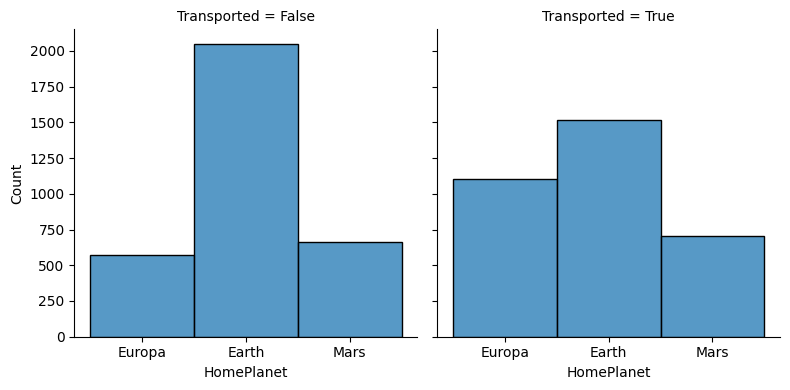

In [42]:
g = sns.FacetGrid(df1, col='Transported', height=4)
g.map(sns.histplot, 'HomePlanet')
plt.show()

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


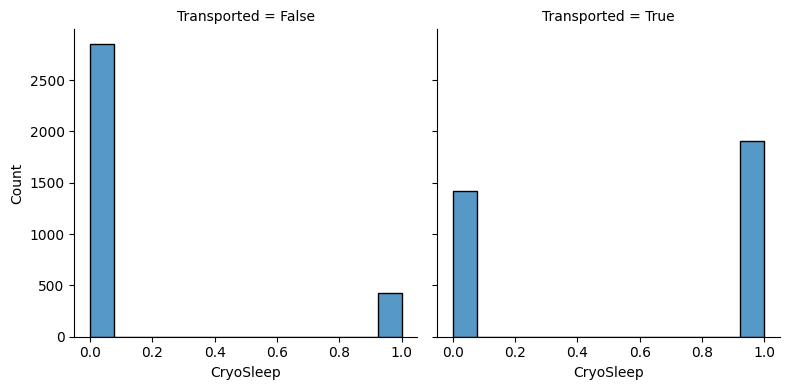

In [43]:
g = sns.FacetGrid(df1, col='Transported', height=4)
g.map(sns.histplot, 'CryoSleep')
plt.show()

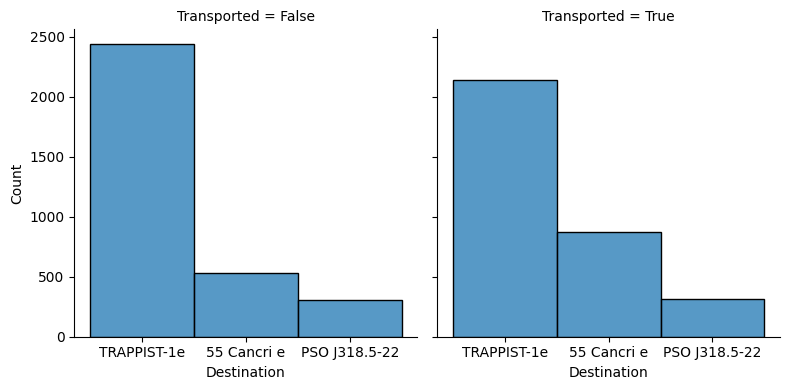

In [44]:
g = sns.FacetGrid(df1, col='Transported', height=4)
g.map(sns.histplot,'Destination')
plt.show()

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


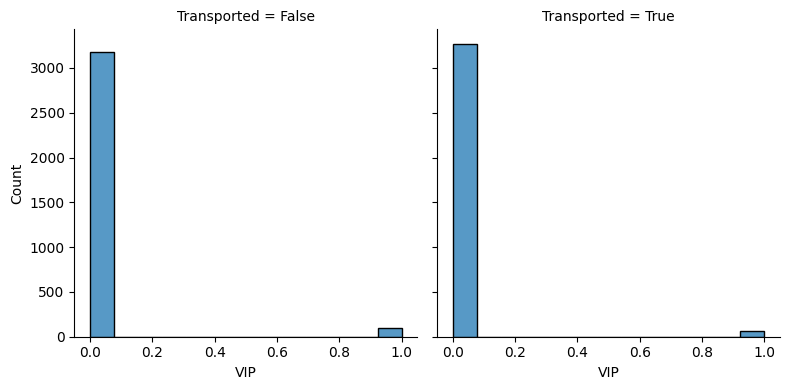

In [45]:
g = sns.FacetGrid(df1, col='Transported', height=4)
g.map(sns.histplot, 'VIP')
plt.show()

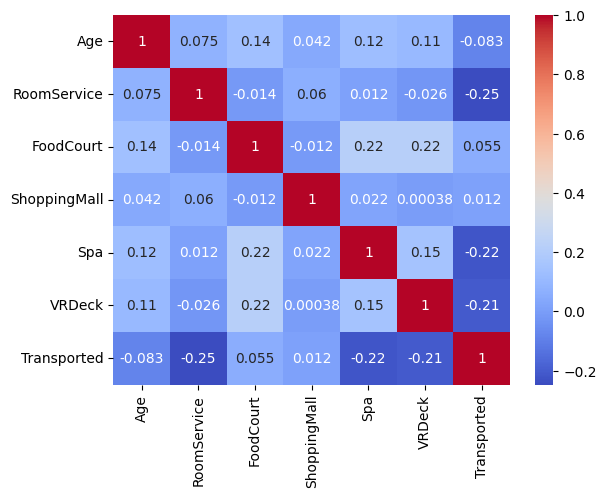

In [46]:
# heatmap_cols= numerical_cols +Transported
sns.heatmap(df1[numerical_cols +['Transported'] ].corr(), annot=True, cmap='coolwarm')
plt.show()

In [47]:
pd.crosstab(df1["HomePlanet"], y_train)


Transported,False,True
HomePlanet,,
Earth,2048,1518
Europa,569,1104
Mars,662,705


In [48]:
pd.crosstab(df1['CryoSleep'],y_train)

Transported,False,True
CryoSleep,,
False,2852,1422
True,427,1905


In [49]:
pd.crosstab(df1['Destination'],y_train)

Transported,False,True
Destination,,
55 Cancri e,531,876
PSO J318.5-22,308,315
TRAPPIST-1e,2440,2136


In [50]:
pd.crosstab(df1[ 'VIP'],y_train)

Transported,False,True
VIP,,
False,3177,3267
True,102,60


In [51]:
s = (X_train.dtypes == 'object')
s

HomePlanet       True
CryoSleep        True
Destination      True
VIP              True
Age             False
RoomService     False
FoodCourt       False
ShoppingMall    False
Spa             False
VRDeck          False
dtype: bool